In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [15]:
%pip install tensorflow
%pip install keras

In [16]:
tf.__version__

'2.15.0'

In [17]:
keras.__version__

'2.15.0'

Q2. Load the Wine Quality dataset and explore its dimensions.

In [19]:
df=pd.read_csv("wine.csv")

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [23]:
df.shape

(1599, 12)

Q3. Check for null values, identify categorical variables, and encode them.

In [24]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(df["quality"])
df["quality"]=lb.transform(df["quality"])

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Q4. Separate the features and target variables from the dataset.

In [31]:
X=df.drop(columns=["quality"])
y=df["quality"]

In [32]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [33]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [34]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=32,test_size=0.33)

In [35]:
X_train_full.shape,y_train_full.shape

((1071, 11), (1071,))

In [39]:
X_valid,X_train=X_train_full[:200],X_train_full[200:]
y_valid,y_train=y_train_full[:200],y_train_full[200:]

Q6. Scale the dataset using an appropriate scaling technique.

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_valid)
sc.transform(X_test)

array([[ 0.65562794,  0.3445695 ,  0.07650642, ..., -1.17011823,
         1.21567839, -0.39487763],
       [ 1.15231578, -1.58309203,  0.88986368, ..., -0.9209581 ,
         1.11291606,  0.58133407],
       [ 0.49006533, -0.438543  ,  0.73735919, ..., -0.1111877 ,
        -0.68542476, -0.88298348],
       ...,
       [-0.77924802, -0.73974011,  0.99153334, ...,  0.57400263,
         0.4449609 ,  0.97181874],
       [ 1.09712824, -1.58309203,  0.83902885, ..., -0.2980578 ,
         1.72949006,  0.38609173],
       [-0.28256019, -1.22165549,  1.95739508, ..., -1.79301853,
        -0.89094942,  1.85040927]])

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

In [48]:
layers=[
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
]

Q8. Create a Sequential model in Keras and add the previously designed layers to it.


In [49]:
model=tf.keras.models.Sequential(layers)

Q9. Print the summary of the model architecture.

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [59]:
loss="binary_crossentropy"
metric=["accuracy"]
optimizer="ADAM"

Q11. Compile the model with the specified loss function, optimizer, and metrics.


In [60]:
model.compile(loss=loss,metrics=metric,optimizer=optimizer)

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [61]:
history=model.fit(X_train,y_train,batch_size=10,epochs=10,validation_data=[X_valid,y_valid],verbose=2)

Epoch 1/10
88/88 - 2s - loss: 1.2390 - accuracy: 0.5649 - val_loss: 0.7408 - val_accuracy: 0.6050 - 2s/epoch - 28ms/step
Epoch 2/10
88/88 - 0s - loss: 0.6725 - accuracy: 0.6028 - val_loss: 0.6080 - val_accuracy: 0.6900 - 224ms/epoch - 3ms/step
Epoch 3/10
88/88 - 0s - loss: 0.6643 - accuracy: 0.6154 - val_loss: 0.6158 - val_accuracy: 0.6950 - 208ms/epoch - 2ms/step
Epoch 4/10
88/88 - 0s - loss: 0.6488 - accuracy: 0.6349 - val_loss: 0.5970 - val_accuracy: 0.6950 - 204ms/epoch - 2ms/step
Epoch 5/10
88/88 - 0s - loss: 0.6507 - accuracy: 0.6257 - val_loss: 0.5932 - val_accuracy: 0.7000 - 210ms/epoch - 2ms/step
Epoch 6/10
88/88 - 0s - loss: 0.6463 - accuracy: 0.6464 - val_loss: 0.6033 - val_accuracy: 0.6550 - 207ms/epoch - 2ms/step
Epoch 7/10
88/88 - 0s - loss: 0.6198 - accuracy: 0.6625 - val_loss: 0.5862 - val_accuracy: 0.7050 - 204ms/epoch - 2ms/step
Epoch 8/10
88/88 - 0s - loss: 0.6288 - accuracy: 0.6602 - val_loss: 0.5519 - val_accuracy: 0.7000 - 260ms/epoch - 3ms/step
Epoch 9/10
88/88 -

Q13. Obtain the model's parameters (weights and biases).

In [63]:
history.params

{'verbose': 2, 'epochs': 10, 'steps': 88}

Q14. Store the model's training history as a Pandas DataFrame.

In [65]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.239045,0.564868,0.740775,0.605
1,0.672484,0.602755,0.608002,0.690
2,0.664282,0.615385,0.615770,0.695
3,0.648786,0.634902,0.596991,0.695
4,0.650713,0.625718,0.593249,0.700
5,0.646337,0.646383,0.603331,0.655
6,0.619776,0.662457,0.586245,0.705
7,0.628758,0.660161,0.551885,0.700
8,0.596491,0.656716,0.597518,0.665
9,0.575250,0.695752,0.565317,0.730


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

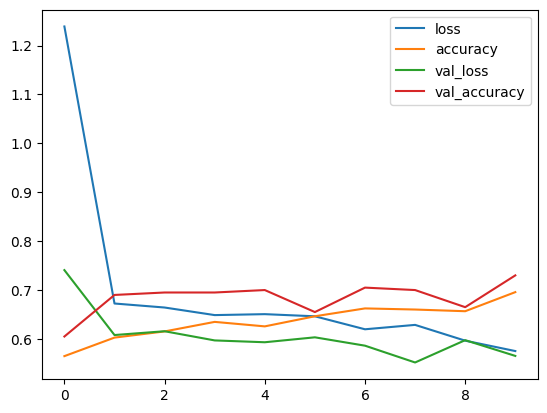

In [66]:
pd.DataFrame(history.history).plot()

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [67]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6572


[0.6543307304382324, 0.6571969985961914]